<a href="https://colab.research.google.com/github/sahilnagarkar36/DSML-lab-manual/blob/main/DSML_NO7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.metrics as metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
Admission = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
Admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
Admission.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
Admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
Admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
Admission.shape

(400, 9)

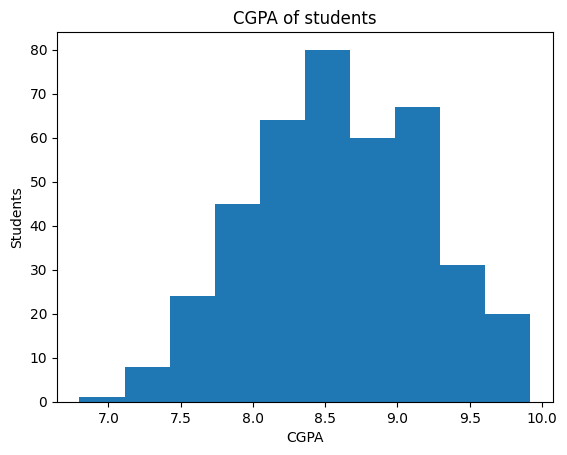

In [ ]:
plt.hist(Admission['CGPA'], bins=10)
plt. xlabel('CGPA')
plt.ylabel('Students')
plt. title('CGPA of students')
plt.show()

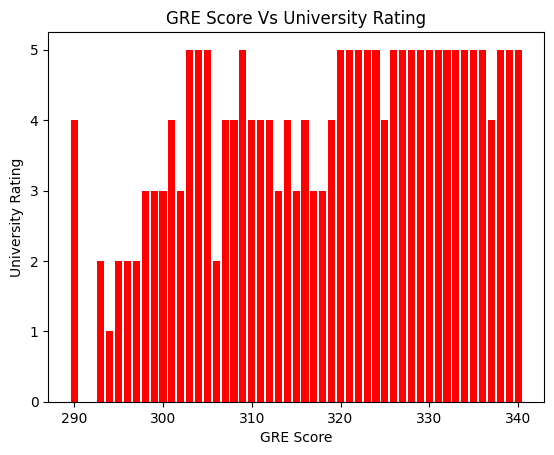

In [ ]:
plt.bar(Admission['GRE Score'], Admission['University Rating'], color='red')
plt. xlabel('GRE Score')
plt.ylabel('University Rating')
plt. title('GRE Score Vs University Rating')
plt.show()

In [ ]:
Admission. loc[Admission['Chance of Admit '] < 0.8, 'Chance of Admit'] = 0
Admission.loc[Admission[ 'Chance of Admit '] >= 0.8, 'Chance of Admit'] = 1

In [ ]:
X=Admission[['GRE Score','CGPA']]
y=Admission['Chance of Admit']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.70, random_state=42)

In [ ]:
X_train.head()

,GRE Score,CGPA
4,314,8.21
256,309,8.56
358,314,7.64
100,322,8.46
226,306,8.45


In [ ]:
y_test.head()

209    0.0
280    0.0
33     1.0
210    0.0
93     0.0
Name: Chance of Admit, dtype: float64

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier = classifier.fit(X_train,y_train)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1.

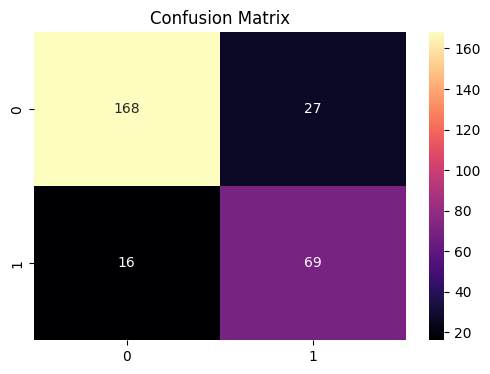

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='magma', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_predict)
precision = metrics.precision_score(y_test,y_predict)
recall = metrics.recall_score(y_test,y_predict)
f1_score = metrics.f1_score (y_test,y_predict)
print("Accuracy:" ,accuracy*100, "%")
print("Precision:" ,precision)
print("Recall:",recall)
print("f1 score:",f1_score)

Accuracy: 84.64285714285714 %
Precision: 0.71875
Recall: 0.8117647058823529
f1 score: 0.7624309392265194


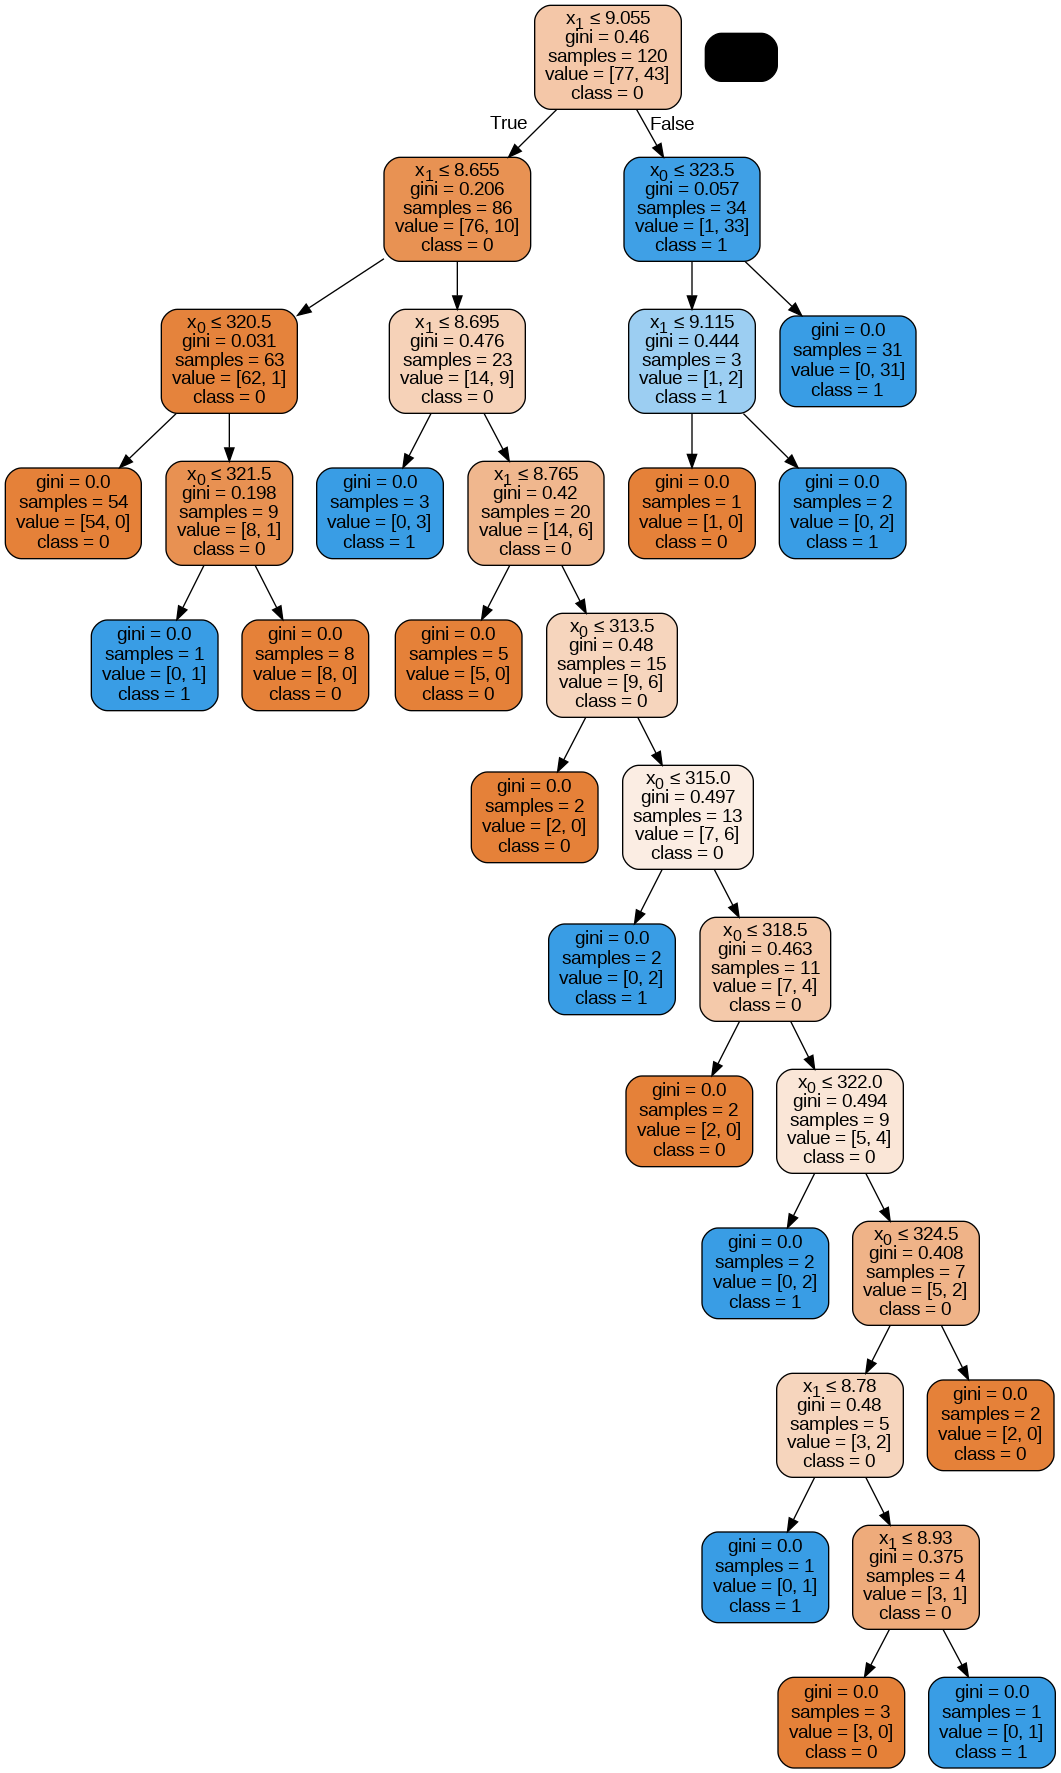

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('admission.png')
Image(graph.create_png())